# Домашнее задание 1 (NumPy, Pandas, Matplotlib)


**Оценка за ДЗ: 9.93** 

In [1]:
# Не забудьте импортировать все необходимые модуля для выполнения заданий
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

## NumPy

При решении задач запрещено использовать циклы. Обратите внимание на функции и методы np.max, np.min, np.arange, np.hstack, np.roll, np.random.uniform, np.random.rand, np.newaxis.

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [3]:
def minMaxEqual(a, b): 
    equal = a == b
    vector = a[equal]
    vector_min, vector_max = vector.min(), vector.max()
    return vector_min, vector_max 

In [4]:
#Проверка 
a = np.array([4, 2, 6, 3]) 
b = np.array([4, 3, 6, -3])
minMaxEqual(a, b)

(4, 6)

#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [5]:
def second_derivative(v):
    polynom = np.poly1d(v[::-1]) # n <=> n+1
    sec_der = np.polyder(polynom, 2)
    array = np.array(sec_der)
    result = array[::-1]
    return result 

In [6]:
#Проверка 
v = np.array([3, 0, 7, 1]) 
second_derivative(v)

array([14,  6])

#### 3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [7]:
def constructArray(X, i, j):
    return X[i,j]

In [8]:
#Проверка 
X = np.array([[20, 187, 34, 33, 88], [22, 23, 18, 24, 24], [34, 24, 56, 15, 14]])
i = np.array([0, 1, 2])
j = np.array([0, 1, 2])
constructArray(X, i, j)

array([20, 23, 56])

#### 4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [11]:
def prevZeroMax(x):
    new = x[:-1] #после символа в конце ничего не стоит, отсекаем 
    index = np.where(new == 0)[0]+1 #индекс нулей => следующий после нуля
    return x[index].max()

In [28]:
#Проверка 
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
prevZeroMax(x)

5

#### 5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размера 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [10]:
def gen_data(lims, k, b, n, noise_level):
    u = np.random.uniform(-noise_level, noise_level, size = n)
    x = np.random.uniform(lims[0], lims[1], n)
    y = k*x + b + u 
    return (x, y)

In [14]:
#Проверка 
np.random.seed(22)
gen_data([-4,4], 2, 0, 50, 1.0)

(array([-2.41953193,  2.25298199,  0.85931091, -0.45199925,  3.85623287,
         1.67164331, -2.25015668, -2.66009361,  0.31012378, -1.49263369,
         3.29229598, -3.30995456, -1.48740776, -2.24690111,  1.89332984,
         2.62832292,  1.9565157 , -2.5797037 ,  2.86762557, -3.9559007 ,
        -1.13885464,  3.62518599,  3.53421109, -3.8156079 ,  1.38412798,
        -2.68708533,  0.54505896, -2.06301635, -2.73715269,  0.02850257,
         0.57436117, -0.24038069,  0.06533792, -1.40998712,  3.09198684,
        -1.98531591,  2.8967025 ,  1.08156952,  1.57778544, -3.75637125,
         1.25849042,  3.99457937,  0.0523638 ,  3.46116601, -0.47357705,
        -2.39977079,  2.43082855,  2.46137647, -3.53637703,  2.32244828]),
 array([-5.42214278,  4.4693261 ,  1.55969788, -0.18563449,  7.05478884,
         3.02101454, -4.95924769, -4.93810453,  0.0610566 , -2.36136555,
         5.60564571, -6.49750173, -2.34736315, -4.00360162,  3.16488238,
         4.26892757,  4.45711915, -4.24374306,  6

#### 6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([[1],[2],[3]]), b = np.array([[0], [-2], [1]]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])
$x*x.T$ - матричное произведение

In [15]:
def calc_value(x, b, a):
    result = np.dot(x, x.transpose()) + np.dot(a, (np.eye(x.shape[0]))) + b
    return result

In [16]:
#Проверка 
x = np.array([[1],[2],[3]]) 
b = np.array([[0], [-2], [1]])
a = 4.5

calc_value(x, b, a)

array([[ 5.5,  2. ,  3. ],
       [ 0. ,  6.5,  4. ],
       [ 4. ,  7. , 14.5]])

## Pandas


Вам предстоит ответить на ряд вопросов о пассажирах Титаника.

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

Описание датасета: https://www.kaggle.com/c/titanic/data

Обратите внимание на функции и методы pd.read_csv, pd.DataFrame{ .head, .shape, .groupby, .fillna }, pd.Series{ .min, .max, .mean, .shape, .std, .corr }

#### 0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [17]:
titanic = pd.read_csv("train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
print("В данном DataFrame'е {} объектов и {} признаков".format(titanic.shape[0], titanic.shape[1]))

В данном DataFrame'е 891 объектов и 12 признаков


#### 1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

In [39]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Типы встречающихся признаков: 
* **Бинарные**: Survived, Sex 
* **Вещественные**: Age (возраст пассажиров), Fare (цена на билет), Parch, Sibsp (кол-во детей/родственников на корабле)
* **Категориальные**: Name, Ticket, Cabin, Embarked
* **Порядковые:** Pclass, PassangerId 

Возможная постановка задач с этими данными: 
* Предсказать, выживет ли человек в зависимости от пола (задача регрессии)
* Определить, в каком порту садился человек в заисимости от цены на билет/определить, какой класс каюты у пассажира в зависимости от количества родственников на корабле (задача классификации)
* Определение пассажиров с разными целями путешествия (задача кластеризации)

#### 2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [40]:
firstclass_num = titanic[titanic.Pclass == 1].Pclass.count()
print("Количество пассажиров, которые ехали первым классом: {}".format(firstclass_num))

Количество пассажиров, которые ехали первым классом: 216


#### 3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [41]:
print("Минимальный возраст: {}".format(titanic.Age.min()), "\n"
       "Максимальный возраст: {}".format(titanic.Age.max()), "\n"
       "Средний возраст: {}".format(round(titanic.Age.mean(), 2)))

Минимальный возраст: 0.42 
Максимальный возраст: 80.0 
Средний возраст: 29.7


#### 4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [42]:
print("Стандартное отклонение цены билетов на Титаник: {}".format(titanic.Fare.std()))

Стандартное отклонение цены билетов на Титаник: 49.693428597180905


#### 5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [43]:
print("Коэффициент коррелляции между ценой на билет и возрастом пассажиров: {}".format(titanic.Age.corr(titanic.Fare)))

Коэффициент коррелляции между ценой на билет и возрастом пассажиров: 0.09606669176903887


#### 6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [44]:
class_age = pd.DataFrame(titanic[titanic.Survived == 1].groupby("Pclass")["Age"].mean())
class_age

,Age
Pclass,
1,35.368197
2,25.901566
3,20.646118


#### 7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [45]:
survived = titanic[titanic.Survived == 1].Survived.count()
total_p = titanic.Survived.count()
surv_total = survived/total_p

surv_man = titanic[(titanic.Survived == 1) & (titanic.Sex == "male")].Survived.count()
surv_female = titanic[(titanic.Survived == 1) & (titanic.Sex == "female")].Survived.count()
surv_fm = surv_man/surv_female

print("Доля выживших пассажиров: {}".format(surv_total), "\n"
      "Отношение выживших мужчин к выжившим женщинам: {}".format(surv_fm))

Доля выживших пассажиров: 0.3838383838383838 
Отношение выживших мужчин к выжившим женщинам: 0.4678111587982833


#### 8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

Один из вариантов проверки этой гипотезы -- рассчитать, сколько пассажиров из выживших и погибших заплатили за билет выше его средней стоимости, и сравнить эти значения. 

In [8]:
surv = titanic[titanic.Survived == 1]
died = titanic[titanic.Survived == 0]

In [87]:
surv_fare1 = titanic[titanic.Survived == 1].Fare.mean()
surv_fare0 = titanic[titanic.Survived == 0].Fare.mean()
print(" Средняя цена билета среди выживших: {}".format(round(surv_fare1, 5)), "\n", 
      "Средняя цена билета среди погибших: {}".format( round(surv_fare0, 5)), "\n",
       surv_fare1 > surv_fare0)
#Средняя цена билета среди выживших больше, чем среди погибших

 Средняя цена билета среди выживших: 48.39541 
 Средняя цена билета среди погибших: 22.11789 
 True


In [79]:
mean_fare = titanic.Fare.mean()
mean_data = titanic[titanic.Fare > mean_fare].Survived.count()
mean_data

211

In [89]:
surv_farem1 = titanic[titanic.Survived == 1].Fare[titanic.Fare > mean_fare].count() / mean_data
surv_farem2 = titanic[titanic.Survived == 0].Fare[titanic.Fare > mean_fare].count() / mean_data

print(" Доля выживших, чья стоимость билета была выше средней: {}".format(round(surv_farem1, 5)), "\n", 
      "Доля погибших, чья стоимость билета была выше средней: {}".format(round(surv_farem2, 5)), "\n", 
      surv_farem1 > surv_farem2)

 Доля выживших, чья стоимость билета была выше средней: 0.59716 
 Доля погибших, чья стоимость билета была выше средней: 0.40284 
 True


#### 9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [46]:
#titanic.Age = titanic.Age.fillna(titanic.Age.mean())
titanic.Age.fillna(titanic.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

## Matplotlib

Обратите внимание, что за отсутствие названий графиков и подписей к осям могут снижаться баллы! Вообще, все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

Обратите внимание на функции и методы plt.plot, plt.scatter, plt.legend, plt.title, plt.xlabel, plt.ylabel, plt.fill_between

#### 1. (3 балла) Используя функцию из задания №5 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_
        

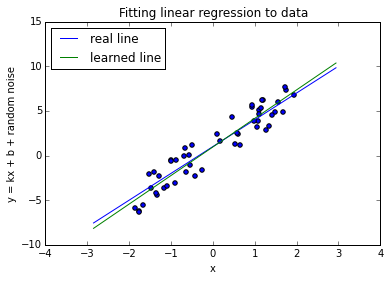

In [4]:
# В итоге ваш график должен получиться примерно таким:

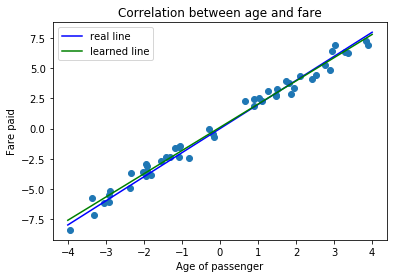

In [5]:
def gen_data(lims, k, b, n, noise_level):
    u = np.random.uniform(-noise_level, noise_level, size = n)
    x = np.random.uniform(lims[0], lims[1], n)
    y = k*x + b + u 
    return (x, y)

def ran_regr(lims, k, b, n, noise_level): 
    
    from sklearn.linear_model import LinearRegression as LR
    
    data = gen_data(lims, k, b, n, noise_level)
    data_x, data_y = data[0].reshape(-1,1),data[1].reshape(-1,1)

    regr = LR()
    regr.fit(data_x.reshape(-1,1),data_y.reshape(-1,1))
    
    x = np.linspace(lims[0], lims[1])
    y = k*x+b 
    
    k_learned, b_learned = regr.coef_, regr.intercept_
    y_learned = x * k_learned[0][0] + b_learned
    
    plt.scatter(data_x, data_y)
    plt.plot(x, y, color='blue')
    plt.plot(x, y_learned, color = "green")

    plt.title("Correlation between age and fare")
    plt.xlabel("Age of passenger")
    plt.ylabel("Fare paid")

    plt.legend(['real line', 'learned line'], loc=2)
    
    plt.show()

ran_regr([-4,4], 2, 0, 50, 1.0)

#### 2. (2 балла) Проверьте визуально полученную при выполнении задания №5 по pandas информацию о корреляции между ценой на билет и возрастом пассажира. Для этого предлагается отобразить все данные, откладывая на одной оси возраст пассажира, а на другой цену билета. Каждая точка должна быть визуально оботражена в виде треугольника зеленого цвета, направленного вниз. Сделайте возможность регулировать величину маркера (например, пусть она передается в качестве параметра в функцию, которая рисует график). Обратите внимание на параметры "marker", "s" и "c" функции plt.scatter.

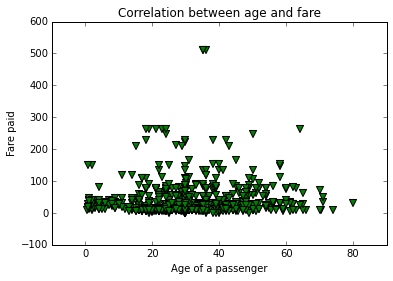

In [5]:
# В итоге ваш график должен получиться примерно таким:

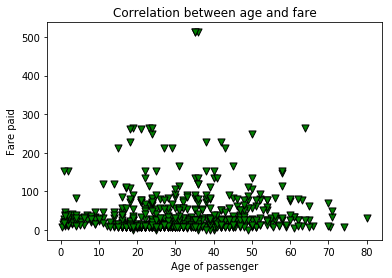

In [50]:
def corr_plot(marker_size): 
    plt.scatter(titanic.Age, titanic.Fare, c = "green", marker = "v", s = marker_size, 
                edgecolors = "black", linewidth='1')
    plt.title("Correlation between age and fare")
    plt.xlabel("Age of passenger")
    plt.ylabel("Fare paid")

corr_plot(50)

#### 3. (3 балла) Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

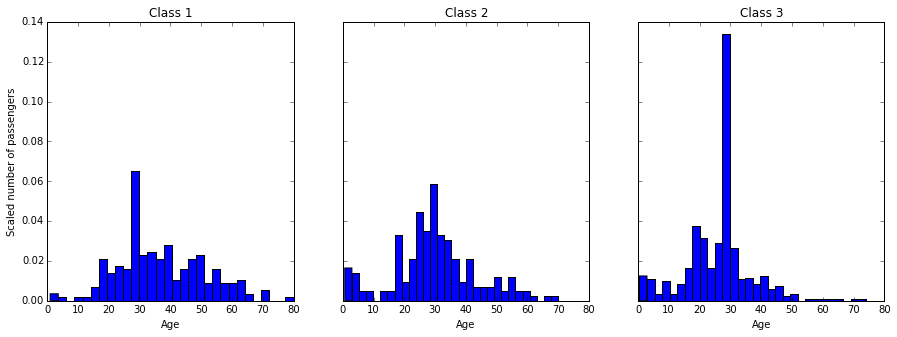

In [6]:
# В итоге ваш график должен получиться примерно таким:

C:\Users\Polina\New folder (3)\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


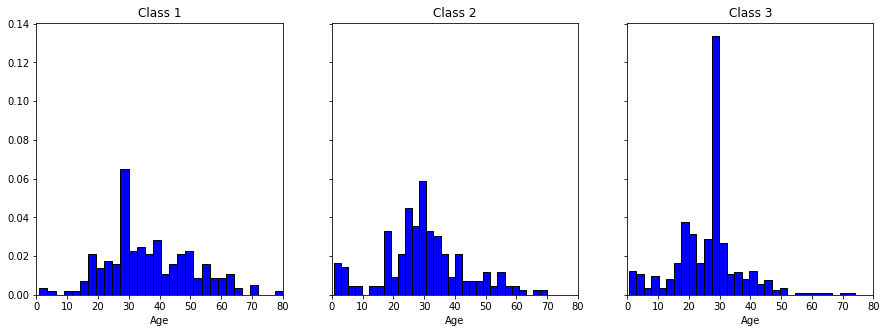

In [51]:
fig, axis = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (15,5))

axis[0].hist(titanic[titanic["Pclass"] == 1].Age.fillna(titanic.Age.mean()), 
            bins = 30, color = "blue", edgecolor = "black", normed = True)
axis[1].hist(titanic[titanic["Pclass"] == 2].Age.fillna(titanic.Age.mean()), 
            bins = 30, color = "blue", edgecolor = "black", normed = True)
axis[2].hist(titanic[titanic["Pclass"] == 3].Age.fillna(titanic.Age.mean()), 
            bins = 30, color = "blue", edgecolor = "black", normed = True)

for i in range(axis.size): 
    axis[i].set_title('Class' + " " + str(i+1))
    axis[i].set_xlabel("Age")
    axis[i].set_xlim(0,80)
    
plt.show()

#### 4. (2 балла) Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

        def gen_uncertain_data():
            x = np.linspace(0, 30, 100)
            y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
            error = np.random.normal(0.1, 0.02, size=y.shape)
            return x, y, error


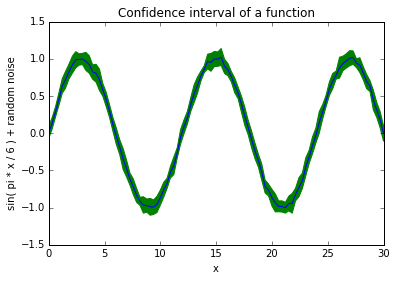

In [7]:
# В итоге ваш график должен получиться примерно таким:

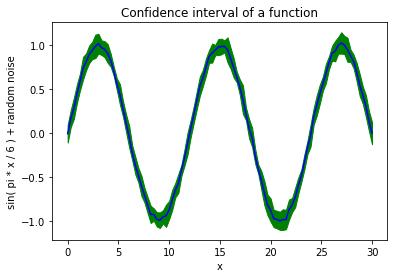

In [52]:
def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error
    
x, y, error = gen_uncertain_data()
plt.plot(x, y, color = "blue")

plt.fill_between(x, y - error, y + error, color = "green")

plt.title('Confidence interval of a function')
plt.xlabel('x')
plt.ylabel('sin( pi * x / 6 ) + random noise')

plt.show()